In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
folders_list = os.listdir('data')

In [9]:
# create dataframe with infromation about users
users_info = pd.DataFrame()
for folder_title in folders_list:
    users_list = os.listdir(f"data\{folder_title}")
    for user in users_list:
        tmp = pd.read_csv(f"data\{folder_title}\{user}\data.csv", sep=',')
        tmp['name'] = user
        tmp['date'] = folder_title
        users_info = pd.concat([users_info, tmp])

users_info

,Unnamed: 0,product_id,quantity,name,date
0,0,47,1,Alexey_Smirnov,2020-12-03
1,1,57,1,Alexey_Smirnov,2020-12-03
2,2,14,2,Alexey_Smirnov,2020-12-03
3,3,52,1,Alexey_Smirnov,2020-12-03
4,4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...,...
1,1,66,4,Rostislav_Petrov,2020-12-09
2,2,39,2,Rostislav_Petrov,2020-12-09
0,0,82,4,Vasiliy_Ivanov,2020-12-09
1,1,74,2,Vasiliy_Ivanov,2020-12-09


In [10]:
# which user bought the most items?
purchases_number= users_info.groupby('name', as_index=False).agg({'quantity': 'sum'})
max_count = purchases_number.quantity.max()
print(*list(purchases_number.query('quantity == @max_count').name), sep=', ')

Alexey_Smirnov, Petr_Smirnov


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

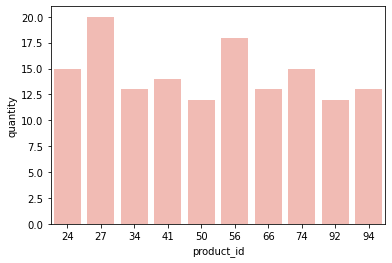

In [11]:
# Find the top 10 products by units sold all time and build a barplot
top_10_products = \
        users_info.groupby('product_id', as_index=False) \
        .agg({'quantity': 'sum'}) \
        .sort_values('quantity', ascending=False) \
        .head(10)

sns.barplot(x='product_id', y='quantity', data=top_10_products, color="salmon", alpha=0.6)

<AxesSubplot:xlabel='date', ylabel='quantity'>

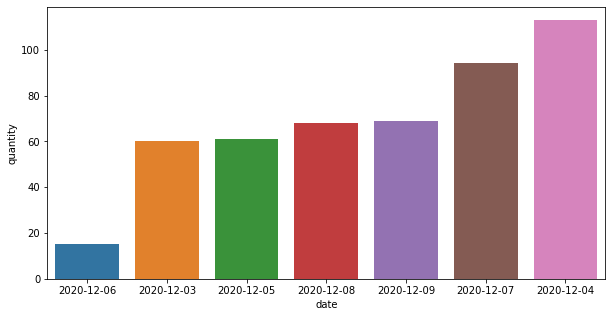

In [12]:
# research purchases by days
purchases_by_days = \
        users_info.groupby('date', as_index=False).agg({'quantity': 'sum'}) \
        .sort_values('quantity')
plt.figure(figsize=(10,5))
sns.barplot(x='date', y='quantity', data=purchases_by_days)


In [13]:
# How many users purchased any product repeatedly (more than 1 time in different days)?
users_info.drop_duplicates(subset=['name', 'date', 'product_id']) \
        .groupby(['name', 'product_id'], as_index=False).agg({'date': 'count'}) \
        .query('date > 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
